# File Mount

In [58]:
# connect to your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# change current path to a certain path(folder) in your drive.
# this folder may contain a image to be use in your homework.
import os
os.chdir('/content/drive/MyDrive/Class')

# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   |
Orange | 255, 128, 0  |
Pink  | 255, 153, 255 |


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

* In the case of color images, the decoded images will $\color{red}{have\;the\; channels\;stored\;in\;B\;G\;R\;order.}$

* To learn more about [cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)


### matplotlib.pyplot.imshow
matplotlib.pyplot.imshow(X, **cmap**=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

* (M, N, 3): an image with RGB values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$).

* (M, N, 4): an image with RGBA values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$),  i.e. including transparency

* To learn more about [matplotlib.pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

![image.png](https://i.imgur.com/Sl4fkuJ.png)



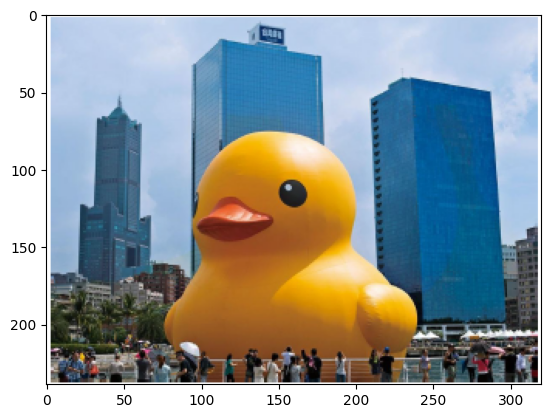

In [60]:
from  matplotlib import pyplot as plt
import cv2
import numpy as np

image = cv2.imread("duck.jpg") # the decoded images will have the channels stored in B G R order.

# change the image matrix into R G B order.
# method 1
# b,g,r = cv2.split(im)
# image = cv2.merge([r,g,b])

# method 2
image = image[:,:,::-1] #倒序排列channel

# show the image
plt.imshow(image)
plt.show()

In [61]:
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.

image shape:  (239, 320, 3)
pixel space in position (100, 150):  [230 159   1]


In [62]:
print('image type: ', image.dtype) # show the format in which the image is stored.

image type:  uint8


# 7 image point processing

At 2. introduction to Computer Vision (p.7) <br>
In this section, use the RGB image matrix you create above to finish the jobs.

![image.png](https://i.imgur.com/D2amXGP.jpg)

## 由以下七題選擇三題完成

### 1. Invert

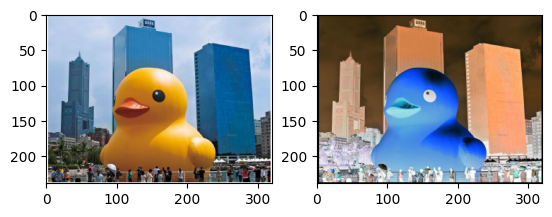

In [63]:
# image invert #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
plt.subplot(121)
plt.imshow(image)
image_invert=255-image
plt.subplot(122)
plt.imshow(image_invert)
plt.show()


### 2. Darken

In [64]:
# image datken #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


### 3. Raise Lighten

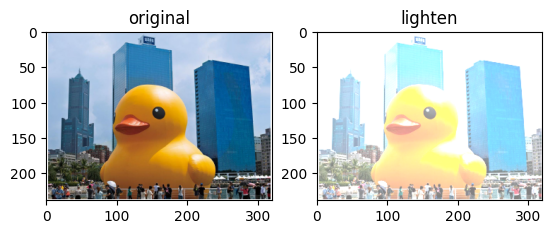

In [65]:
# image lighten #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
plt.subplot(121)
plt.imshow(image)
plt.title('original')
image1=image.astype('int32')
image_lighten=np.clip(image1+128,0,255)

plt.subplot(122)
plt.imshow(image_lighten)
plt.title('lighten')
plt.show()

### 4. Lower Contrast

In [66]:
# image Lower Contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


### 5. Raise Contrast

In [67]:
# image raise contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


### 6. Non-linear Lower Contrast

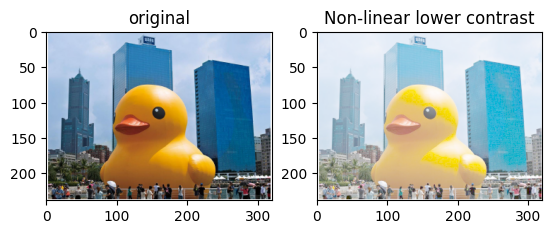

In [68]:
# Non-linear lower contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
plt.subplot(121)
plt.imshow(image)
plt.title("original")
image_non_linear_lower=np.zeros((239,320,3),dtype='uint8')
for i in range(239):
  for j in range(320):
    for k in range(3):
      image_non_linear_lower[i][j][k]=255*(image[i][j][k]/255)**(1/3)
plt.subplot(122)
plt.imshow(image_non_linear_lower)
plt.title("Non-linear lower contrast")
plt.show()

### 7. Non-linear Raise Contrast

In [69]:
# Non-linear raise contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


## Result

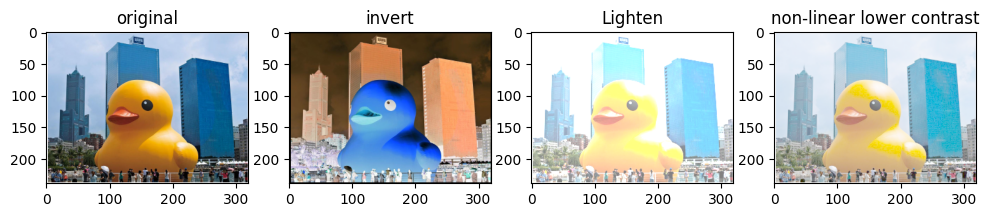

In [70]:
# plot all the point processing image #
# -------------- To do ----------------- #
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.imshow(image)
plt.title('original')
plt.subplot(142)
plt.imshow(image_invert)
plt.title('invert')
plt.subplot(143)
plt.imshow(image_lighten)
plt.title('Lighten')
plt.subplot(144)
plt.imshow(image_non_linear_lower)
plt.title('non-linear lower contrast')
plt.show()

# Filtering an Image
### Opencv Library
First, we use a package to show how gaussian filters change your original image.

filter with original, image shape: (182, 276, 3)
filter with 3*3 kernel, image shape: (182, 276, 3)
filter with 5*5 kernel, image shape: (182, 276, 3)
filter with 7*7 kernel, image shape: (182, 276, 3)


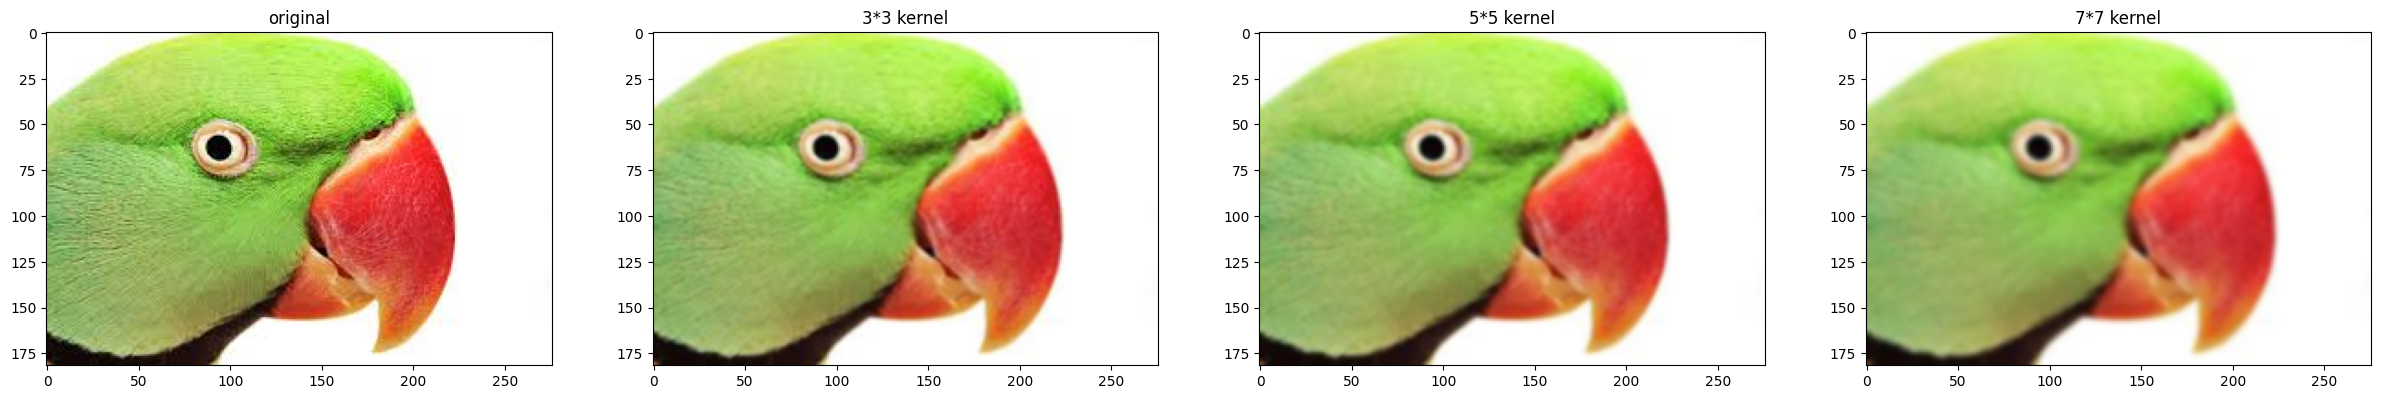

In [71]:
image = cv2.imread("bird.jpg")
image = image[:,:,::-1]

image_list = []
image_list.append(image)
image_list.append(cv2.GaussianBlur(image,(3,3),0))
image_list.append(cv2.GaussianBlur(image,(5,5),0))
image_list.append(cv2.GaussianBlur(image,(7,7),0))
title_list = []
title_list.append('original')
title_list.append('3*3 kernel')
title_list.append('5*5 kernel')
title_list.append('7*7 kernel')

fig = plt.figure(figsize=(30,60))
for im,ss,i in zip(image_list,title_list,range(0, 4)):
  plt.subplot(1,4,i+1)
  plt.imshow(im)
  plt.title(ss)
  print('filter with {}, image shape: {}'.format(ss, im.shape))
plt.show()



## Step 1 : Get gaussian filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

In [72]:
# define a function that could return a gaussian kernel based on "KernelSize" variable input.

import math

def GaussianKernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize):
          #高斯函數公式
          # -------------- To do ----------------- #
          center=KernelSize//2
          k=-((i-center)**2+(j-center)**2)/(2*sigma**2)
          a=1/(2*math.pi*sigma**2)
          G=a*math.e**(k)
          total+=G
          Filter_list.append(G)
      Gaussian+= [Filter_list]
  #print(Gaussia)
  return np.array(Gaussian)/total

KernelSize = 7 # use kernel size 7 in this section
Gaussian_Kernel=GaussianKernel(KernelSize)

# you should print the sum of the filter and the kernel itself as the result of this cell
print('Sum of the filter: ',np.sum(Gaussian_Kernel))
print('filter: \n', Gaussian_Kernel)

Sum of the filter:  0.9999999999999998
filter: 
 [[0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00835139 0.02990239 0.06427974 0.082959   0.06427974 0.02990239
  0.00835139]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]]


## Step 2 : Padding

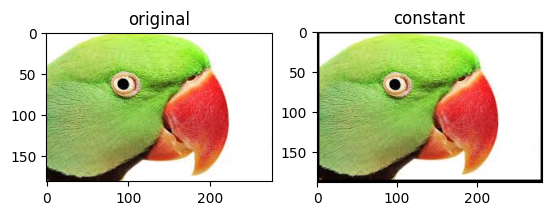

(182, 276, 3)
(188, 282, 3)


In [73]:
# define a function that could return a image matrix with zero-padding based on the input "img" and "p_size".

def padding_img(img,p_size,style='constant'):
  # -------------- To do ----------------- #
  w,h,c=img.shape
  p_image=np.zeros((w+p_size*2,h+p_size*2,3)).astype('uint8')
  p_image[p_size:-p_size,p_size:-p_size,:]+=img


  return p_image
# you should plot the original image, the padding image and their shape.
# -------------- To do ----------------- #
p_image=padding_img(image,3) #padding size 3
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.subplot(122)
plt.imshow(p_image)
plt.title('constant')
plt.show()
print(image.shape)
print(p_image.shape)

## Step 3 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [74]:
# define a function that does the convlution operation with the input image matrix and input kernel matrix.

def Convolution(image, Kernel):
  row, col, depth = image.shape
  resx=np.zeros((row,col,3)) #initial a result image
  KernelSize,h=Kernel.shape
  padimg = padding_img(image,(KernelSize-1)//2)

  # -------------- To do ----------------- #

  center=KernelSize//2
  for k in range(depth):
    for i in range(row):
      for j in range(col):
        for u in range(-(KernelSize-1)//2,(KernelSize-1)//2+1):
          for v in range(-(KernelSize-1)//2,(KernelSize-1)//2+1):
            resx[i][j][k]+=Kernel[center+u][center+v]*padimg[i+u][j+v][k]
  resx=np.clip(resx,0,255).astype('uint8')
  return resx

resx = Convolution(image, Gaussian_Kernel) # we get a result matrix here.
print('Convolution Finished!')

Convolution Finished!


## Step 4 : Result

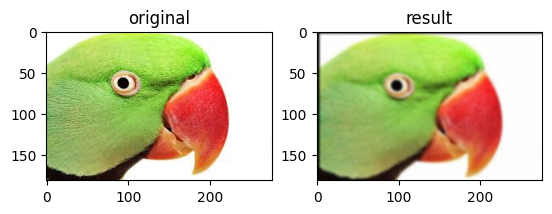

(182, 276, 3)
(182, 276, 3)


In [75]:
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.

# -------------- To do ----------------- #
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.subplot(122)
plt.imshow(resx)
plt.title('result')
plt.show()
print(image.shape)
print(resx.shape)

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'original')

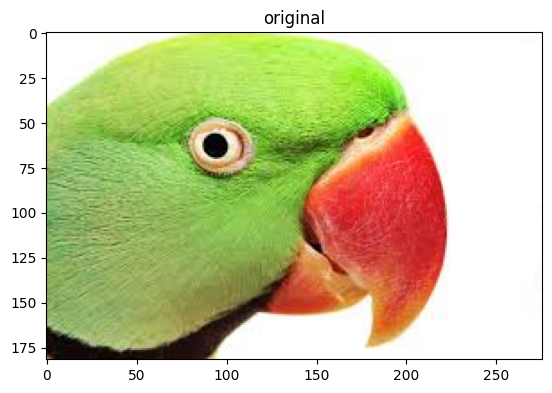

In [77]:
image = cv2.imread("bird.jpg")
image = image[:,:,::-1]

plt.imshow(image)
plt.title('original')

## 以下四個 Filter 選擇一項來完成

### Sharpening Filter

[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


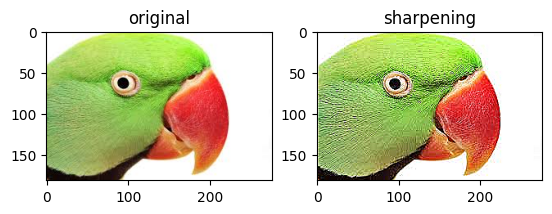

In [78]:
# you could use the conv function in your previous work.
# use [0 -1 0] to sharp your image
#    [-1 5 -1]
#    [0 -1 0]
KernelSize = 3

def Sharpening(image, KernelSize):
  # -------------- To do ----------------- #
  sharpen=np.array([[0,-1,0],
          [-1,5,-1],
          [0,-1,0]]).astype('float')
  print(sharpen)
  sharpening=Convolution(image,sharpen)
  return sharpening

# plot the image and shape
# -------------- To do ----------------- #
sharpening=Sharpening(image,KernelSize) #padding size 3
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.subplot(122)
plt.imshow(sharpening)
plt.title('sharpening')
plt.show()

### Mean Filter

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


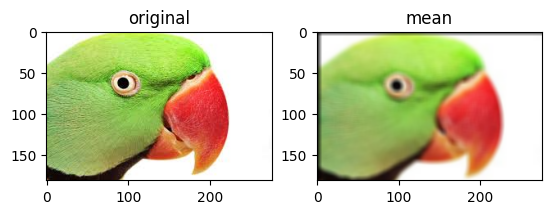

In [79]:
# you could use the conv function in your previous work.
KernelSize = 7

def Mean(image, KernelSize):
  # -------------- To do ----------------- #
  Mean_kernel=np.empty((KernelSize,KernelSize))
  for i in range(KernelSize):
    for j in range(KernelSize):
      Mean_kernel[i][j]=1/49
  print(Mean_kernel)
  mean_=Convolution(image,Mean_kernel)
  return mean_

# plot the image and shape
# -------------- To do ----------------- #
mean=Mean(image,KernelSize) #padding size 3
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.subplot(122)
plt.imshow(mean)
plt.title('mean')
plt.show()

### Shift Filter

In [80]:
# you could use the function in your previous work.
KernelSize = 7

def Shift(image, KernelSize):
  # -------------- To do ----------------- #

  return shift_

# plot the image and shape
# -------------- To do ----------------- #

### Thresholding Filter

In [81]:
def Thresholding(img, threshold = 125):
  # -------------- To do ----------------- #
  return img_

# plot the image and shape
# -------------- To do ----------------- #


# Downsampling & Upsampling

## Downsampling

![](https://i.imgur.com/0zrrdKy.png)

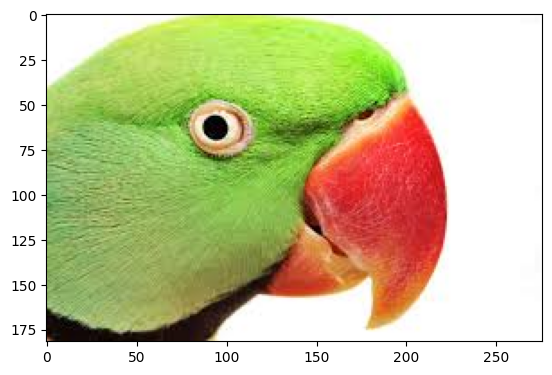

image shape:  (182, 276, 3)


In [82]:
# read your image here and show it
# you should cover with the image and its shape
img = cv2.imread('bird.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.show()
print('image shape: ', img_RGB.shape)

In [83]:
# define a function that downsample the image with the input image matrix and the scale.
# the function will return a modefied image matrix.

def DownSamplingFunction(src,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #
  row,col,depth=src.shape
  dst=[]
  dst=[]
  for i in range(0,row,samplingScale):
    cols=[]
    for j in range(0,col,samplingScale):
      layer=[]
      for k in range(depth):
        layer.append(src[i][j][k])
      cols.append(layer)
    dst.append(cols)
  dst=np.array(dst)
  return dst.astype('uint8')

### Downsampling Without Gaussian Filter

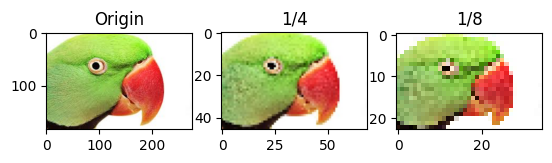

original image:(182, 276, 3)
1/4 image:(46, 69, 3)
1/8 image:(23, 35, 3)


In [84]:
# plot your result with 2 scale, 1/4 and 1/8, also their shape.

# ----------- to do ------------------ #
img_4=DownSamplingFunction(img_RGB,4)
img_8=DownSamplingFunction(img_RGB,8)

# plot the image and shape
# -------------- To do ----------------- #
plt.subplot(131)
plt.imshow(img_RGB)
plt.title('Origin')
plt.subplot(132)
plt.imshow(img_4)
plt.title('1/4')
plt.subplot(133)
plt.imshow(img_8)
plt.title('1/8')
plt.show()
print(f'original image:{img_RGB.shape}')
print(f'1/4 image:{img_4.shape}')
print(f'1/8 image:{img_8.shape}')


### Downsampling With Gaussian Filter

In [85]:
## Gaussian
# ----------- to do 1, filtering the image with gaussian ------------------ #
# you could grab the function from your previous work!
G_Kernel=GaussianKernel(7)
Gaussian_img=Convolution(img_RGB,G_Kernel)
# ----------- to do 2, down sampling ------------------ #
# 2 scale, 1/4 and 1/8
img_4=DownSamplingFunction(Gaussian_img,4)
img_8=DownSamplingFunction(Gaussian_img,8)

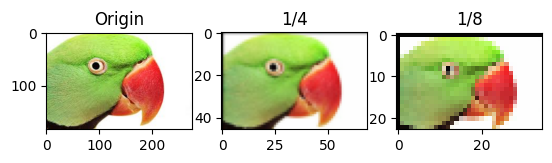

original image:(182, 276, 3)
1/4 image:(46, 69, 3)
1/8 image:(23, 35, 3)


In [86]:
# ----------- to do 3, plot ------------------ #
#　plot your result and also their shape.
plt.subplot(131)
plt.imshow(img_RGB)
plt.title('Origin')
plt.subplot(132)
plt.imshow(img_4)
plt.title('1/4')
plt.subplot(133)
plt.imshow(img_8)
plt.title('1/8')
plt.show()
print(f'original image:{img_RGB.shape}')
print(f'1/4 image:{img_4.shape}')
print(f'1/8 image:{img_8.shape}')

## Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

In [87]:
# ---------- to do 1, upsampling ------------ #
# using 1/8 image from previous work, using nearest neightbor method
def UpSamplingFunction(src,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #
  row,col,depth=src.shape
  dst=[]
  dst=[]
  for i in range(0,row):
    cols=[]
    for j in range(0,col):
      layer=[]
      for k in range(depth):
        layer.append(src[i][j][k])
      for y in range(samplingScale):
        cols.append(layer)
    for x in range(samplingScale):
      dst.append(cols)
  dst=np.array(dst)
  return dst.astype('uint8')
img_up8=UpSamplingFunction(img_8,8)

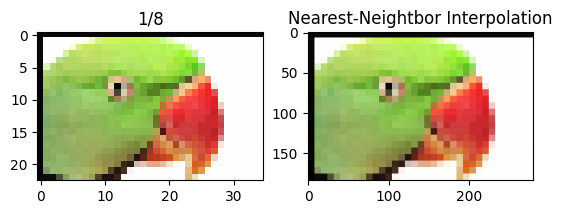

1/8 image:(23, 35, 3)
Nearest-Neightbor Interpolation:(184, 280, 3)


In [88]:
# ---------- to do 2, plot ------------ #
# you should cover with the result image and the shape
plt.subplot(121)
plt.imshow(img_8)
plt.title('1/8')
plt.subplot(122)
plt.imshow(img_up8)
plt.title('Nearest-Neightbor Interpolation')
plt.show()
print(f'1/8 image:{img_8.shape}')
print(f'Nearest-Neightbor Interpolation:{img_up8.shape}')

# Bicubic Interpolation
You don't have to do this section. This is just a appendix.
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [ ]:
from tqdm import trange

# method 1, using package
img_bic = cv2.resize(img_G_1_8, (image.shape[1],image.shape[0]), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood

# method 2, hand craft function

def Bicubic_function(s,a=-0.5):
  # -------------- To do ----------------- #

  return k

def bicubic(img, ratio, a):
  W = int(img.shape[1]*ratio)
  H = int(img.shape[0]*ratio)
  img = padding_img(img,2,style='edge')
  dst = np.zeros((H, W, 3))
  delta = 1/ratio
  for j in trange(H):
    for i in range(W):
      # -------------- To do ----------------- #

  return np.clip(dst,0,255).astype('uint')

img_bic_hand = bicubic(img_G_1_8, 8, -0.5)

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.title('1 / 8')
plt.imshow(img_G_1_8)
plt.subplot(1,2,2)
plt.title('bicubic')
plt.imshow(img_bic_hand)
plt.show()

print('1/8 shape: ', img_G_1_8.shape)
print('upsampling shape: ', img_bic_hand.shape)